In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics


# Since it takes such a long time to fit the KMeans algorithm on the data, I found the MiniBatchKMeans mini-batch implementation of k-means clustering provided by scikit-learn instead. This will dramatically reduce the amount of time it takes to fit the algorithm to the data.
from sklearn.cluster import MiniBatchKMeans

# %%
#module.show_radviz_plot(X_train, y_train, 10)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train / 255
x_test = x_test / 255 

X = x_train
#np.concatenate((x_train, x_test))
Y = y_train
#np.concatenate((y_train, y_test))

## Elbow method

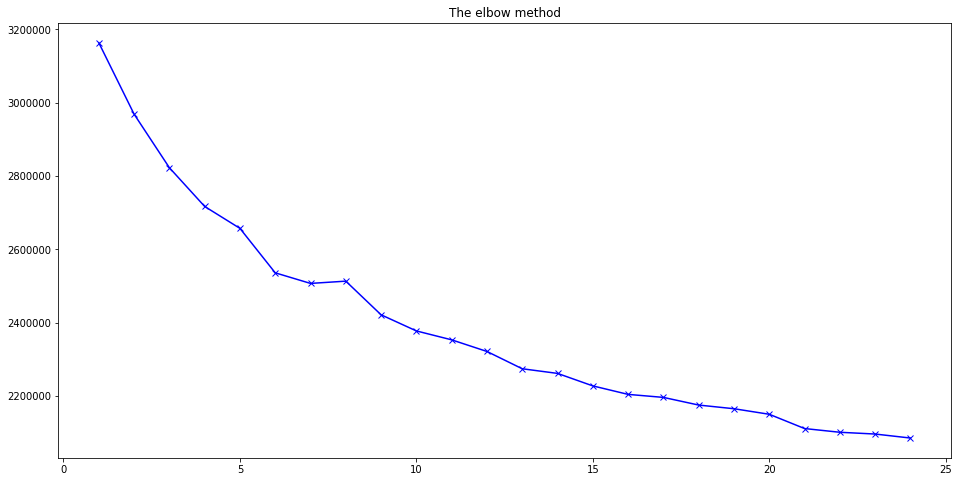

In [3]:
wcss = []
for i in range(1,25):
    km = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,25), wcss, 'bx-')
plt.title('The elbow method')
plt.show()

### Unlike with the iris dataset, it’s not clear where the elbow occurs. If we squint we might conclude that either 8 or 10 is optimum, and we know that MNIST has 10 classes for digits 0-9. But the result is by no means conclusive and is certainly up for interpreter error.